In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from zipfile import ZipFile
import requests
import io
import math
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import pandas as pd


In [46]:

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
response = requests.get(url)
with ZipFile(io.BytesIO(response.content)) as z:
    with z.open('student-mat.csv') as f:
        data = pd.read_csv(f, sep=";")

Data exploration

In [47]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [48]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


The dataset contains 33 columns, which can be categorized as follows:

### Demographic Information:
- **school**: The school the student attends (GP or MS).
- **sex**: Gender of the student (M or F).
- **age**: Age of the student.
- **address**: Student's home address type (urban or rural).
- **famsize**: Family size (less than or equal to 3 or greater than 3).
- **Pstatus**: Parent's cohabitation status (living together or apart).

### Parental Information:
- **Medu**: Mother's education level.
- **Fedu**: Father's education level.
- **Mjob**: Mother's job.
- **Fjob**: Father's job.
- **guardian**: Guardian of the student.

### School Information:
- **traveltime**: Home to school travel time.
- **studytime**: Weekly study time.
- **failures**: Number of past class failures.
- **schoolsup**: Extra educational support.
- **famsup**: Family educational support.
- **paid**: Extra paid classes within the course subject.
- **activities**: Extra-curricular activities.
- **nursery**: Attended nursery school.
- **higher**: Wants to take higher education.
- **internet**: Internet access at home.
- **romantic**: In a romantic relationship.

### Social and Health Information:
- **famrel**: Quality of family relationships.
- **freetime**: Free time after school.
- **goout**: Going out with friends.
- **Dalc**: Workday alcohol consumption.
- **Walc**: Weekend alcohol consumption.
- **health**: Current health status.
- **absences**: Number of school absences.

### Academic Performance:
- **G1, G2, G3**: Grades in the first, second, and final periods (0 to 20).

This dataset provides a comprehensive view of students' demographic, social, and academic aspects, allowing for a detailed analysis of various factors affecting student performance.

Data exploration and plots

In [49]:
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Continuous Features:")
print(continuous_features)

print("Categorical Features:")
print(categorical_features)

Continuous Features:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical Features:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [50]:
# Define the calculate function
def calculate(numeric_vector):
    return {
        "Count": numeric_vector.count(),
        "Miss.": numeric_vector.isna().sum(),
        "Card.": numeric_vector.nunique(),
        "Min": numeric_vector.min(),
        "Q1": numeric_vector.quantile(0.25),
        "Mean": numeric_vector.mean(),
        "Median": numeric_vector.median(),
        "Q3": numeric_vector.quantile(0.75),
        "Max": numeric_vector.max(),
        "SD": numeric_vector.std()
    }

def Plan(df, features):
    numeric_df = df[features] 
    data_quality_plan = pd.DataFrame(columns=["Feature", "Count", "Miss.", "Card.", "Min", "Q1", "Mean", "Median", "Q3", "Max", "SD"])
    for col in numeric_df:
        stats = calculate(numeric_df[col])
        stats["Feature"] = col
        data_quality_plan = pd.concat([data_quality_plan, pd.DataFrame([stats])], ignore_index=True)
    return data_quality_plan


data_quality_plan1 = Plan(data, continuous_features)
data_quality_plan1.loc[:, "Count":"SD"] = data_quality_plan1.loc[:, "Count":"SD"].round(1)

#data_quality_plan1

# Plot the DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_quality_plan1.columns),
                fill_color='#61222D',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[data_quality_plan1[column] for column in data_quality_plan1.columns],
               fill_color='lavender',
               align='left'))])
fig.update_layout(width=1500, height=600)  # Adjust the size of the figure
fig.show()
data_quality_plan1.to_csv("tables/data_quality_plan1.csv", index=False)

C:\Users\tiaan\AppData\Local\Temp\ipykernel_11528\74738848.py:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



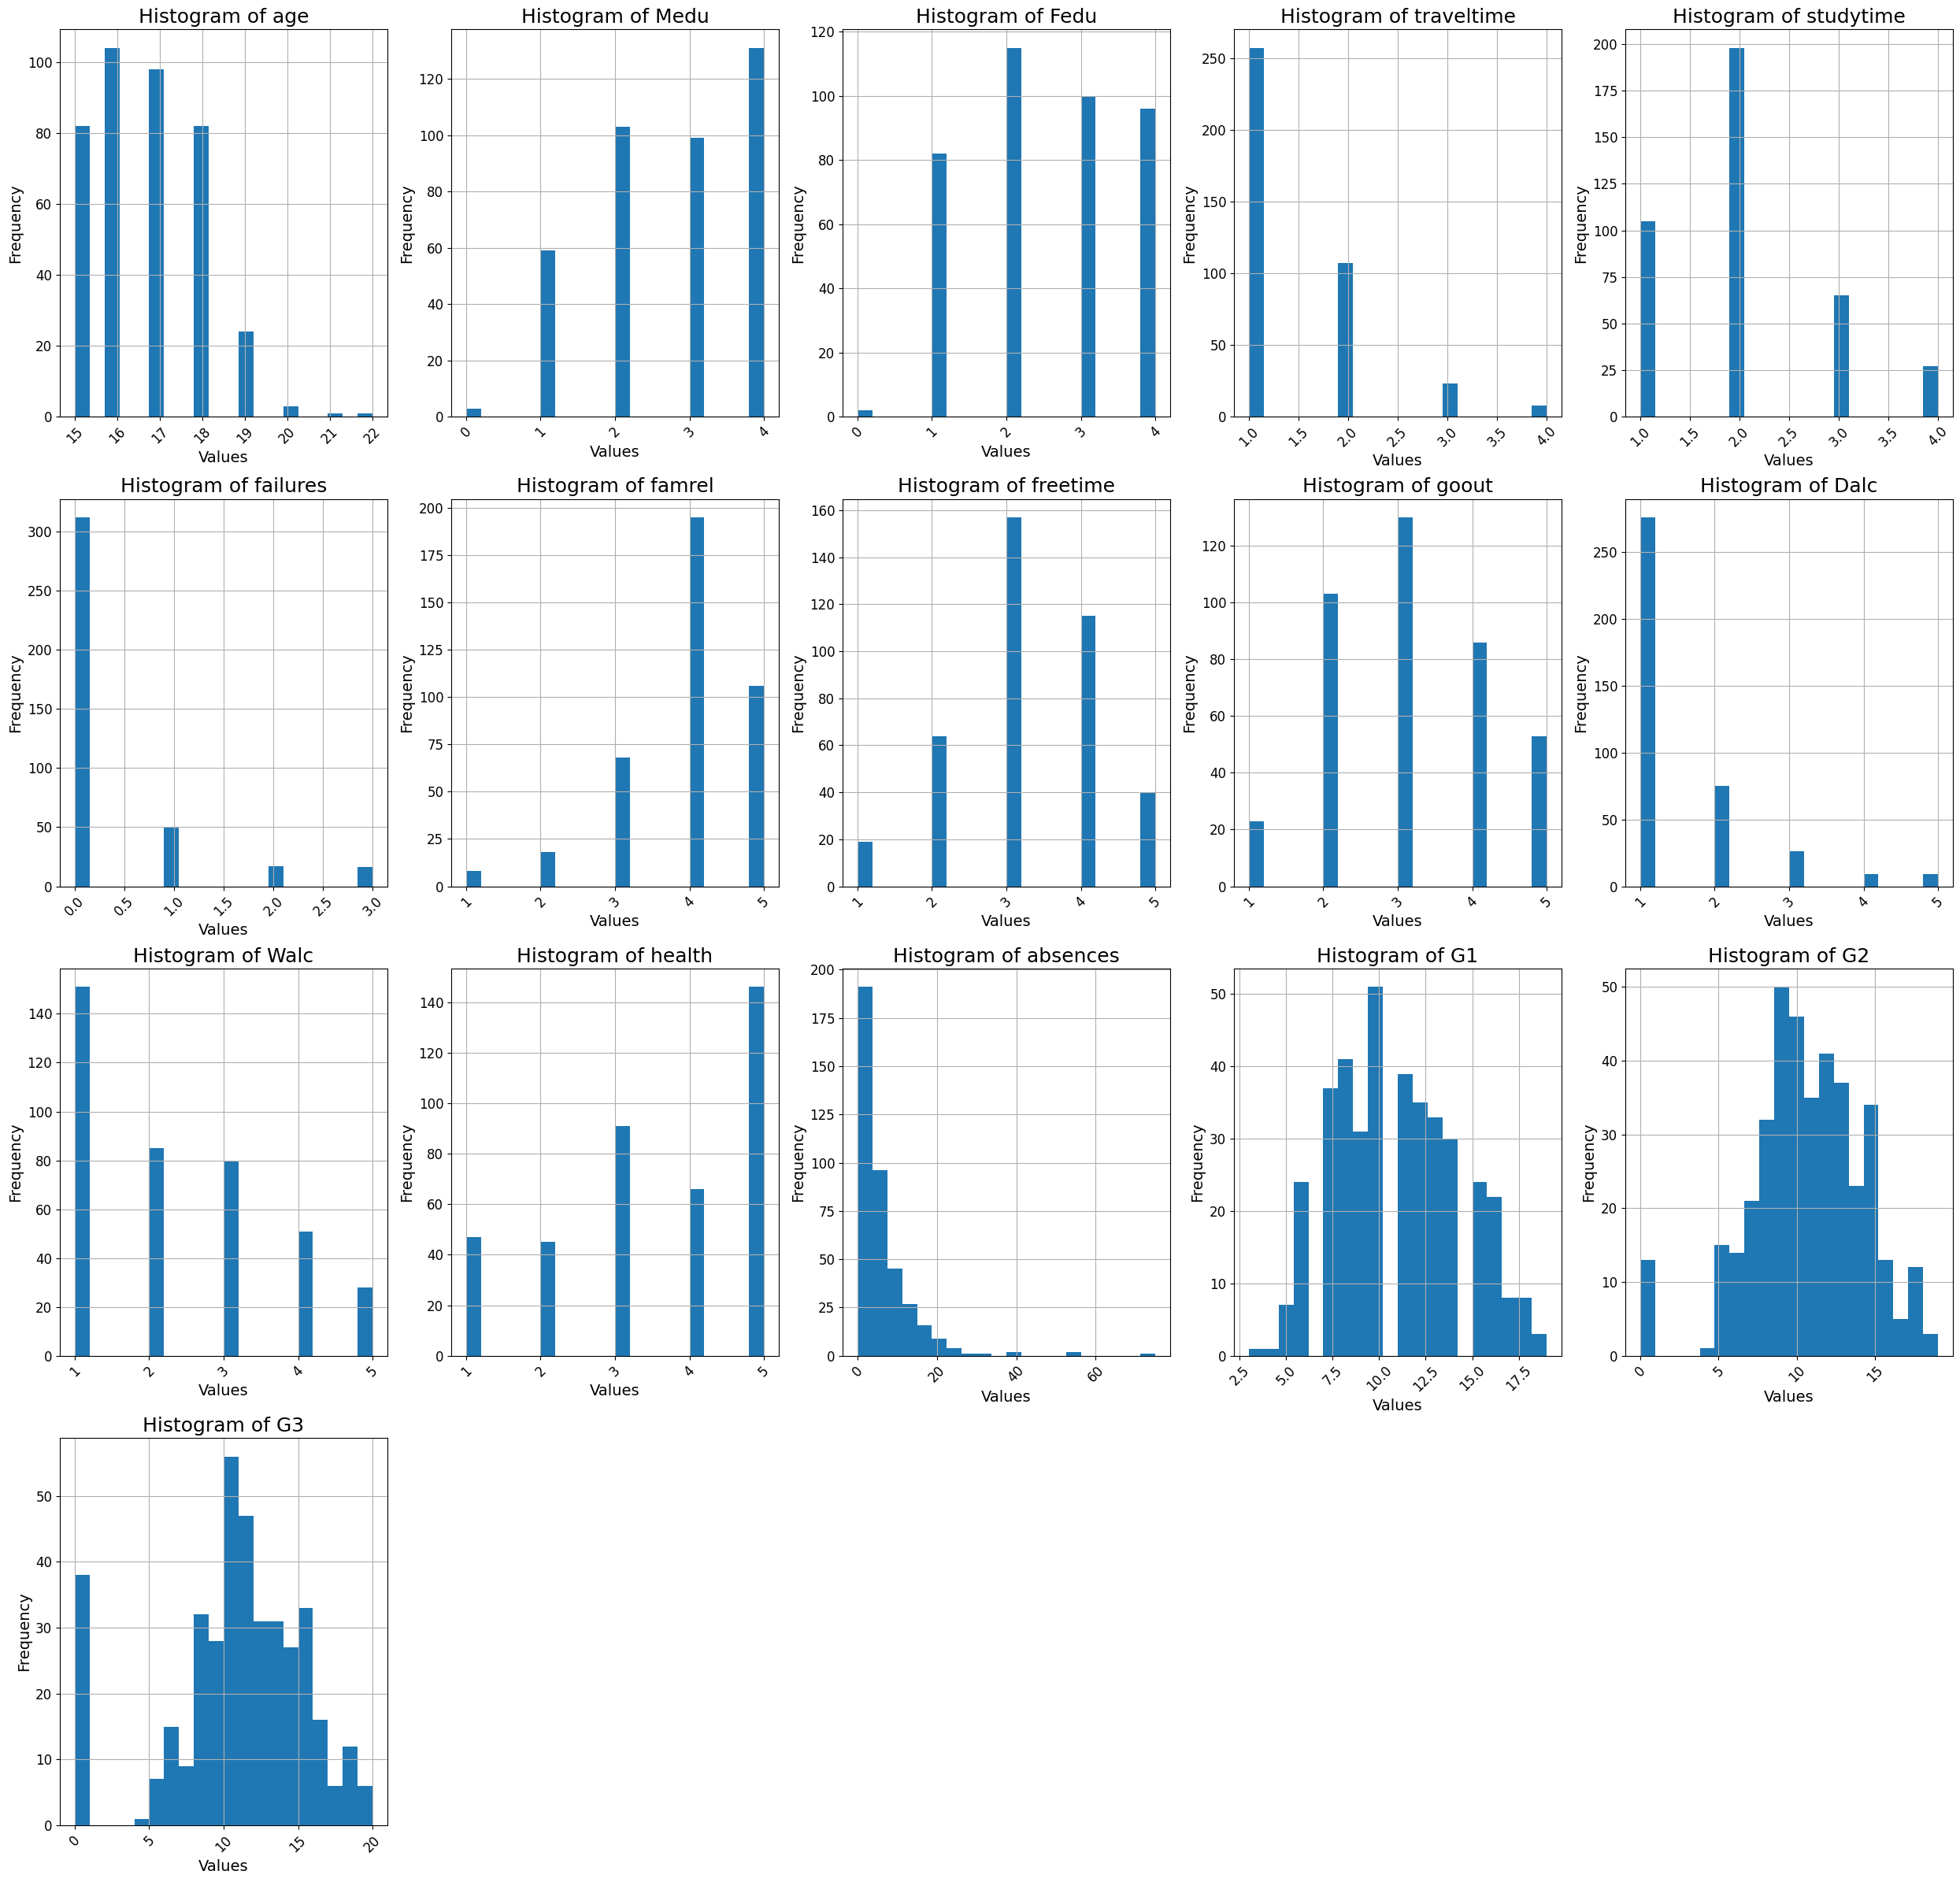

In [51]:
# Determine the number of rows and columns for the subplot grid
n = len(continuous_features)
ncols = 5
nrows = math.ceil(n / ncols)

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 6*nrows))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each continuous feature
for i, feature in enumerate(continuous_features):
    data[feature].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=18)
    axes[i].set_xlabel('Values', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Remove unused subplots
if n < nrows * ncols:
    for i in range(n, nrows * ncols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [52]:
# Define the calculate function for categorical features
def calculate_categorical(vector):
    stats = {
        "Count": vector.count(),
        "Miss.": vector.isna().sum(),
        "Card.": vector.nunique()
    }
    
    # Calculate mode and related statistics
    mode_data = vector.mode()
    if len(mode_data) > 0:
        mode_val = mode_data[0]
        mode_count = vector.value_counts().iloc[0]
        stats["Mode"] = mode_val
        stats["Mode Freq"] = mode_count
        stats["Mode %"] = (mode_count / stats["Count"]) * 100
    else:
        stats["Mode"] = np.nan
        stats["Mode Freq"] = np.nan
        stats["Mode %"] = np.nan
    
    # Calculate second mode and related statistics if possible
    if vector.value_counts().shape[0] > 1:
        second_mode_val = vector.value_counts().index[1]
        second_mode_count = vector.value_counts().iloc[1]
        stats["2nd Mode"] = second_mode_val
        stats["2nd Mode Freq"] = second_mode_count
        stats["2nd Mode %"] = (second_mode_count / stats["Count"]) * 100
    else:
        stats["2nd Mode"] = np.nan
        stats["2nd Mode Freq"] = np.nan
        stats["2nd Mode %"] = np.nan

    return stats

def Plan_categorical(df, features):
    categorical_df = df[features] 
    data_quality_plan = pd.DataFrame(columns=["Feature", "Count", "Miss.", "Card.", "Mode", "Mode Freq", "Mode %", "2nd Mode", "2nd Mode Freq", "2nd Mode %"])
    for col in categorical_df:
        stats = calculate_categorical(categorical_df[col])
        stats["Feature"] = col
        data_quality_plan = pd.concat([data_quality_plan, pd.DataFrame([stats])], ignore_index=True)
    return data_quality_plan

data_quality_plan2 = Plan_categorical(data, categorical_features)
data_quality_plan2.loc[:, ["Mode %", "2nd Mode %"]] = data_quality_plan2.loc[:, ["Mode %", "2nd Mode %"]].round(1)
data_quality_plan2.to_csv("tables/data_quality_plan2.csv", index=False)

#data_quality_plan2

# Plot the DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_quality_plan2.columns),
                fill_color='#61222D',
                align='left',
                font=dict(color='white')),
    cells=dict(values=[data_quality_plan2[column] for column in data_quality_plan2.columns],
               fill_color='lavender',
               align='left'))])
fig.update_layout(width=1500, height=800)  # Adjust the size of the figure
fig.show()

C:\Users\tiaan\AppData\Local\Temp\ipykernel_11528\342783405.py:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



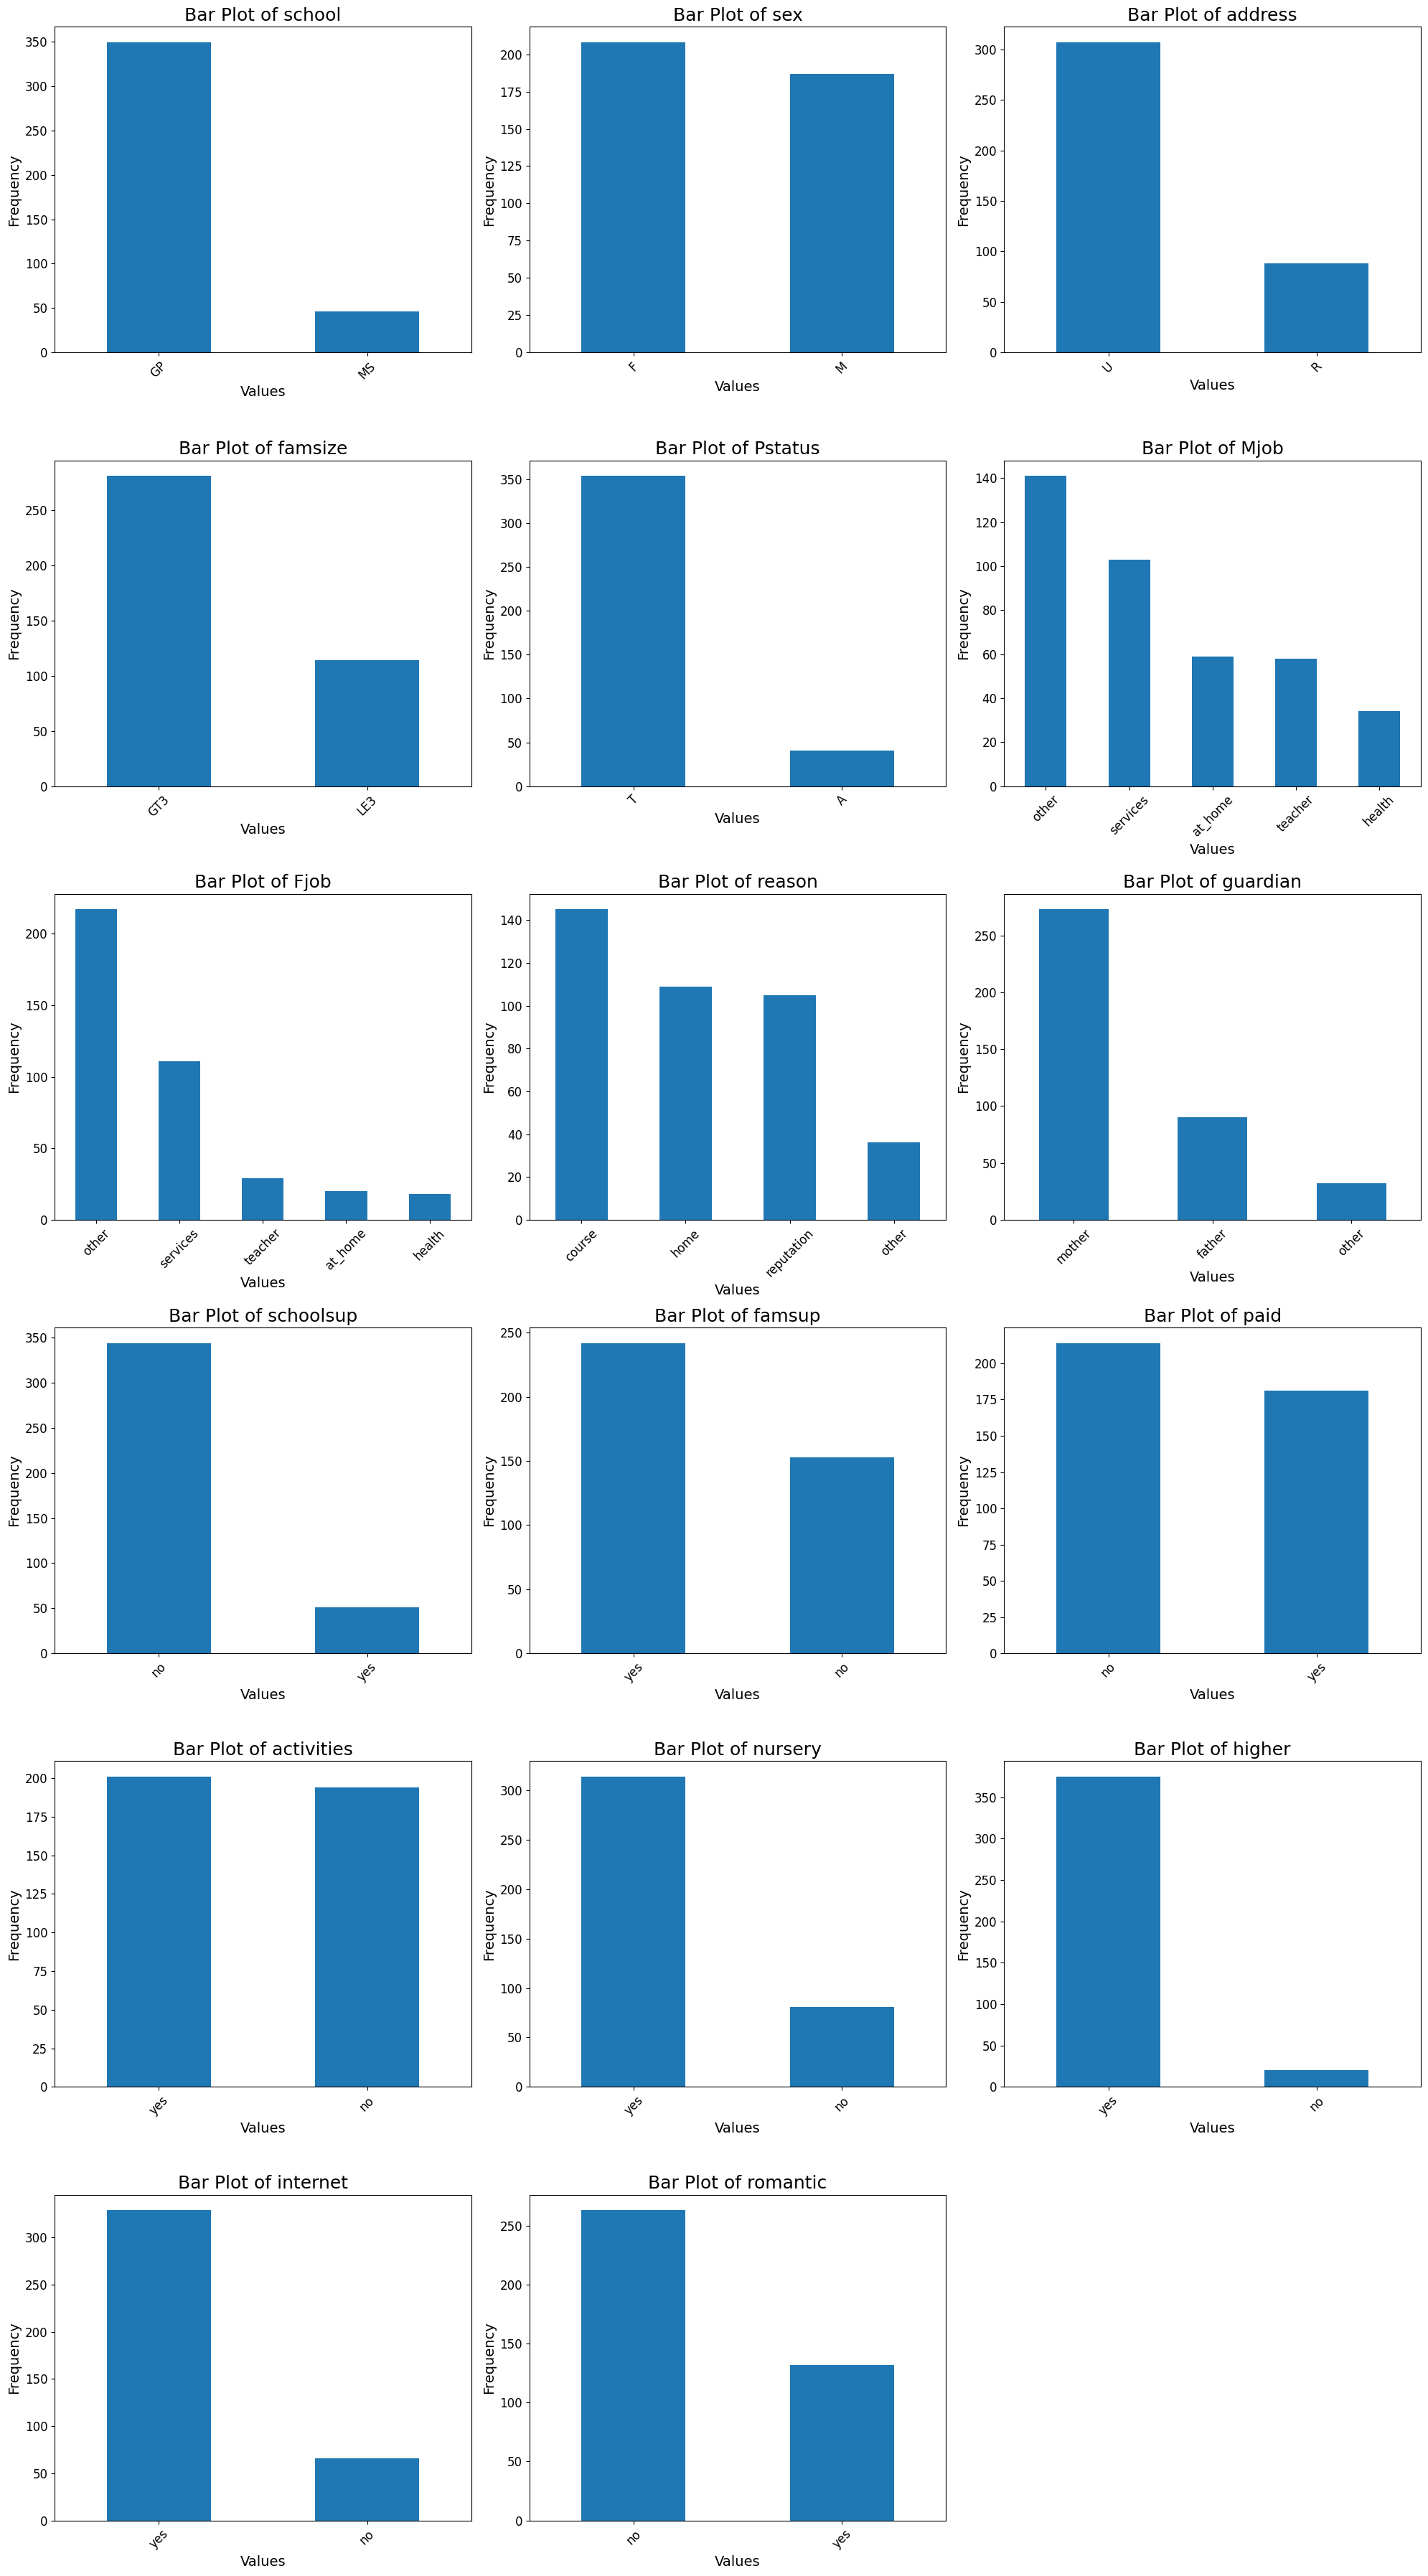

In [53]:
import math
import matplotlib.pyplot as plt

# Assuming categorical_features is defined somewhere in your code
# categorical_features = [...]

# Check if there are any categorical features
if categorical_features:
    n = len(categorical_features)
    ncols = 3  # Change the number of columns to 3
    nrows = math.ceil(n / ncols)

    # Create the subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))

    # Flatten the axes array
    axes = axes.flatten()

    # Plot bar plots for each categorical feature
    for i, feature in enumerate(categorical_features):
        data[feature].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Bar Plot of {feature}', fontsize=18)
        axes[i].set_xlabel('Values', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=14)
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    # Remove unused subplots
    if n < nrows * ncols:
        for i in range(n, nrows * ncols):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features to plot.")

Data preprocessing

### Remove Low Variance Features:

In [54]:
variances = data[continuous_features].var()
low_variance_features = variances[variances < 0.01].index.tolist()
filtered_continuous_features = [f for f in continuous_features if f not in low_variance_features]
print("Filtered Continuous Features:", filtered_continuous_features)


Filtered Continuous Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### Correlation Analysis

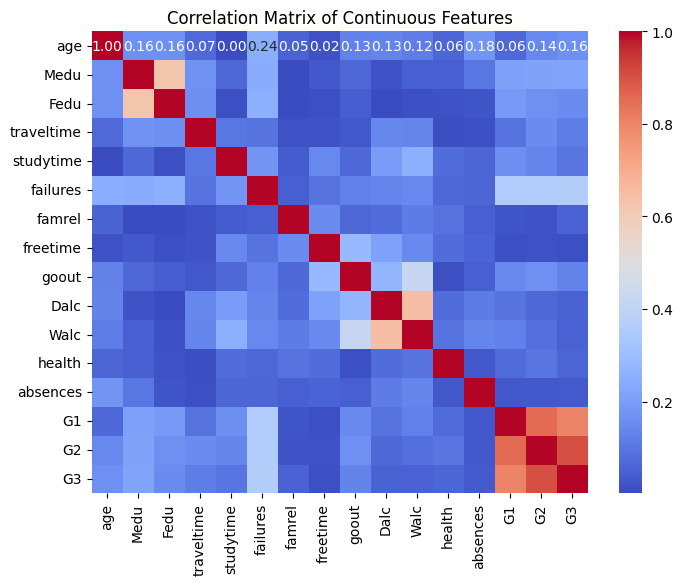

In [55]:
# Calculate correlation matrix
correlation_matrix = data[continuous_features].corr().abs()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()


In [56]:
import numpy as np


correlation_matrix = data[filtered_continuous_features].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Print the features that are being removed
print("Highly correlated features (correlation > 0.9):", highly_correlated_features)

filtered_continuous_features = [f for f in filtered_continuous_features if f not in highly_correlated_features]
print("Features after removing high correlation:", filtered_continuous_features)

Highly correlated features (correlation > 0.9): ['G3']
Features after removing high correlation: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [57]:
from sklearn.ensemble import RandomForestRegressor

X = data[filtered_continuous_features]
y = data['G3']  # Assuming 'G3' is the target


model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': filtered_continuous_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


       Feature  Importance
14          G2    0.768687
12    absences    0.127866
0          age    0.021704
11      health    0.011541
6       famrel    0.011118
13          G1    0.010996
4    studytime    0.008040
1         Medu    0.007113
2         Fedu    0.006546
8        goout    0.006126
10        Walc    0.005449
5     failures    0.004705
7     freetime    0.004617
3   traveltime    0.003623
9         Dalc    0.001868


In [58]:
# Select numerical features
numerical_features = ['age', 'absences', 'G2', 'G3']
#numerical_features = continuous_features
X = data[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

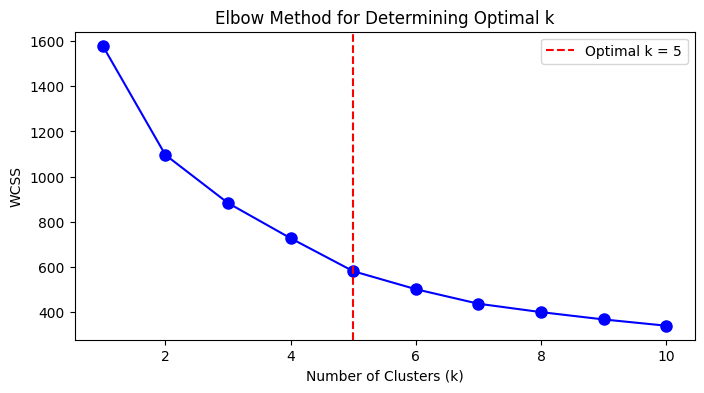

Optimal number of clusters: 5


In [59]:
import time
import numpy as np
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt



def determine_optimal_clusters(X, max_k=10):
    """
    Determine the optimal number of clusters using the elbow method.

    Args:
        X (np.ndarray): The dataset, where rows are samples and columns are features.
        max_k (int): The maximum number of clusters to consider.

    Returns:
        int: The optimal number of clusters.
    """
    wcss = []
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    knee_locator = KneeLocator(
        range(1, max_k + 1), wcss, curve="convex", direction="decreasing"
    )
    elbow_point = knee_locator.knee

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), wcss, 'bo-', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Determining Optimal k')
    plt.axvline(elbow_point, linestyle='--', color='r', label=f'Optimal k = {elbow_point}')
    plt.legend()
    plt.show()

    if elbow_point is None:
        raise ValueError("KneeLocator could not find an optimal number of clusters.")
    
    return elbow_point


# Determine optimal number of clusters
optimal_clusters = determine_optimal_clusters(X_scaled, max_k=10)
print(f"Optimal number of clusters: {optimal_clusters}")



In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform, cdist
import numpy as np

# K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_wcss = kmeans.inertia_



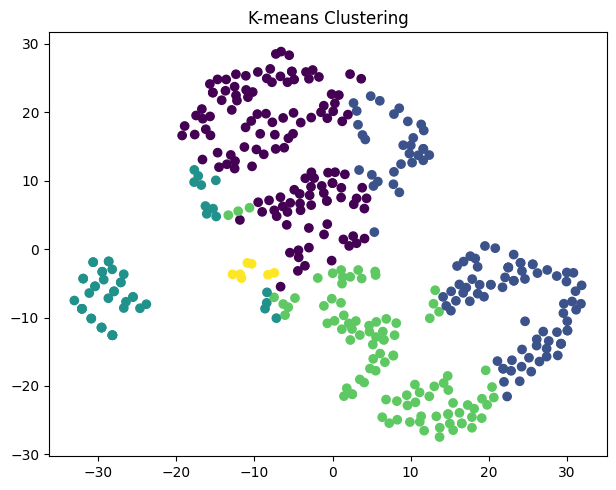

In [61]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.tight_layout()
plt.show()